In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from unidecode import unidecode
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib.patches import Circle, Rectangle
from matplotlib.patheffects import withStroke
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In this small project we are going take a look at Asian countries' population and other parameters.

In [2]:
dir_path = '/home/mahdi/python3_files/datasets'
file_name = 'AsiaPopulation2020.csv'
population_df = pd.read_csv(f'{dir_path}/{file_name}')

First of all, let's fetch the latitude and langitude of countries from Google. I'm going to do it with Selenium.

In [72]:
lat_long = []
s = Service('/home/mahdi/chromedriver')
dr = webdriver.Chrome(service=s)
for i in population_df.Country:
    dr.get(f'https://www.google.com/search?q=lat+and+long+of+{i}&oq=lat+and+long+of+iran&aqs=chrome..69i57j0i22i30.8922j0j7&sourceid=chrome&ie=UTF-8')
    x = dr.find_element(By.XPATH, '//*[@id="rso"]/div[1]/div/div[1]/div/div[1]/div[1]/div/div[2]/div/div/div/div[1]')
    lat_long.append(x.text)

In [73]:
population_df['Coordinates'] = lat_long

Lat = []
Lan = []
for i in population_df.Coordinates:
    x = i.replace('° N','').replace('° E', '').replace('° W', '').replace('° S', '').split(',')
    Lan.append(x[0])
    Lat.append(x[1])
    
population_df['Lat'] = Lat
population_df['Lan'] = Lan  

population_df.drop(columns=['Coordinates'], inplace=True)

population_df.Lat = population_df.Lat.astype('float')
population_df.Lan = population_df.Lan.astype('float')

In [113]:
population_df[['Lat', 'Lan']].to_csv('lat_lang.csv', index=True)

In [3]:
population_df[['Lat', 'Lan']] = pd.read_csv('lat_lang.csv')[['Lat', 'Lan']]

In [10]:
population_df.sample(frac=.20) #sample dataset (it has 51 instances)

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare,Lat,Lan
49,Vietnam,97338579,0.91,876473,314,310070,-80000,2.1,32,38.0,1.25,108.2772,14.0583
0,Afghanistan,38928346,2.33,886592,60,652860,-62920,4.6,18,25.0,0.50,67.7100,33.9391
33,Philippines,109581078,1.35,1464463,368,298170,-67152,2.6,26,47.0,1.41,121.7740,12.8797
21,Kyrgyzstan,6524195,1.69,108345,34,191800,-4000,3.0,26,36.0,0.08,74.7661,41.2044
30,North Korea,25778816,0.44,112655,214,120410,-5403,1.9,35,63.0,0.33,127.5101,40.3399
4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11,90.3563,23.6850
16,Israel,8655535,1.60,136158,400,21640,10000,3.0,30,93.0,0.11,34.8516,31.0461
11,Hong Kong,7496981,0.82,60827,7140,1050,29308,1.3,45,NaN,0.10,114.1694,22.3193
44,Timor-Leste,1318445,1.96,25326,89,14870,-5385,4.1,21,33.0,0.02,125.7275,8.8742
42,Tajikistan,9537645,2.32,216627,68,139960,-20000,3.6,22,27.0,0.12,71.2761,38.8610


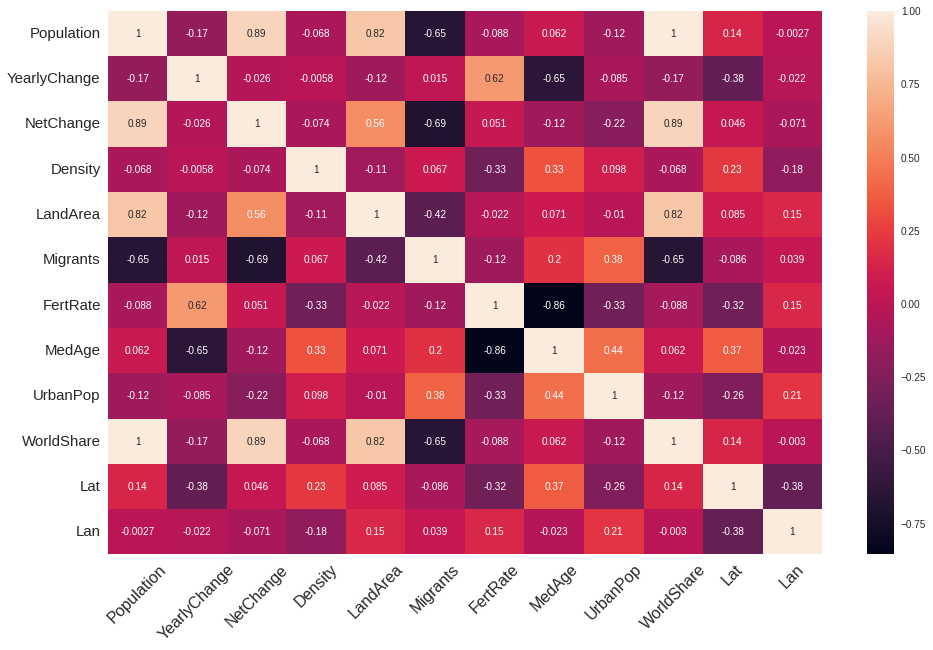

In [21]:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (16, 10))
sns.heatmap(population_df.corr(), annot=True)
plt.xticks(rotation=45, size=16);
plt.yticks(size=15);

In [22]:
most_poplulated_countries = population_df.sort_values('Population', ascending=False).head(10)
least_poplulated_countries = population_df.sort_values('Population', ascending=False).tail(5)

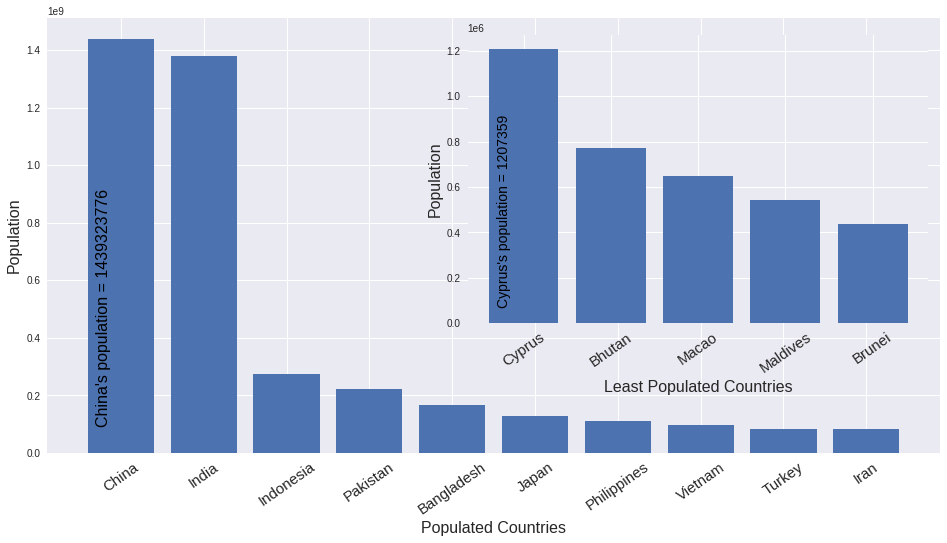

In [33]:
plt.style.use('seaborn')
#plt.style.use('default')
fig1, ax1 = plt.subplots(figsize = (16, 8))
#fig.set_facecolor('grey')

#most_poplulated_countries.plot(x='Country', y='Population', color='blue', ax=ax, marker='o', ls='')
#least_poplulated_countries.plot(x='Country', y='Population', color='red', ax=ax, marker='o', ls='')
#most_poplulated_countries.plot(kind='hist', x='Country', y='Population', ax=ax)
ax1.bar(most_poplulated_countries.Country, most_poplulated_countries.Population)
ax1.set_xlabel('Populated Countries', size=16)
ax1.set_ylabel('Population', size=16)
China_pop = population_df[population_df.Country == 'China'].Population.values[0]
ax1.text(-.3,100000000, f'China\'s population = {China_pop}' , color='black', rotation= 90, size=16)
plt.xticks(rotation=35, size=15);

ax1_2 = fig1.add_axes([0.49, 0.35, 0.4, 0.5])
ax1_2.bar(least_poplulated_countries.Country, least_poplulated_countries.Population)
Cyprus_pop = population_df[population_df.Country == 'Cyprus'].Population.values[0]
ax1_2.text(-.3,80000, f'Cyprus\'s population = {Cyprus_pop}' , color='black', rotation= 90, size=14)
ax1_2.set_xlabel('Least Populated Countries', size=16)
ax1_2.set_ylabel('Population', size=16)
plt.xticks(rotation=35, size=15);

Issue one: Countries with old population

In [34]:
countries_old_population = population_df.sort_values('FertRate', ascending=True).sort_values('MedAge', ascending=False).head(10)
countries_young_population = population_df.sort_values('FertRate', ascending=False).sort_values('MedAge', ascending=True).head(10)

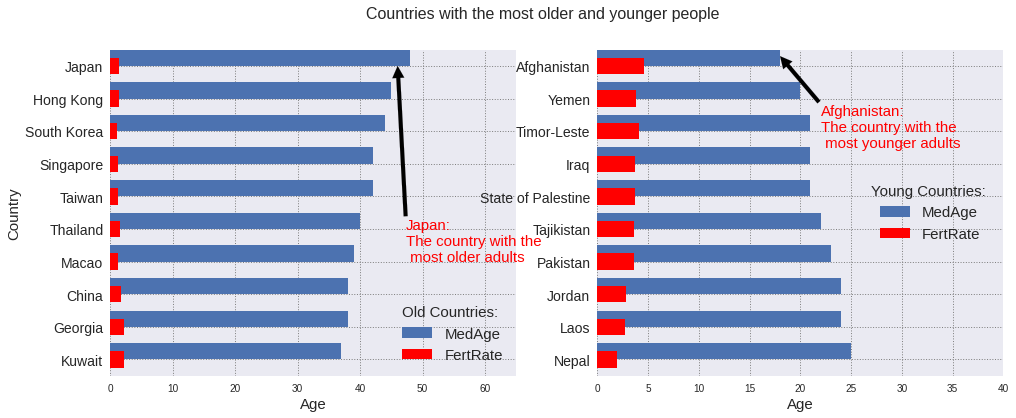

In [68]:
plt.style.use('seaborn')
fig2, ax2 = plt.subplots(1,2, figsize = (16, 6))
fig2.set_facecolor('white')
fig2.suptitle('Countries with the most older and younger people', size=16)
countries_old_population[::-1].plot.barh('Country', 'MedAge', ax=ax2[0], align='edge')
countries_old_population[::-1].plot.barh('Country', 'FertRate', ax=ax2[0], color='red')
ax2[0].set_xlabel('Age', fontsize=15)
ax2[0].set_ylabel('Country', fontsize=15)
plt.sca(ax=ax2[0])
plt.yticks(size=14)

countries_young_population[::-1].plot.barh('Country', 'MedAge', ax=ax2[1], align='edge')
countries_young_population[::-1].plot.barh('Country', 'FertRate', ax=ax2[1], color='red')
ax2[1].set_ylabel('')
ax2[1].set_xlabel('Age', fontsize=15)
plt.sca(ax=ax2[1])
plt.yticks(size=14)

ax2[0].annotate('Japan:\nThe country with the\n most older adults', xy=(46, 9), xytext=(47.3, 3), arrowprops=dict(connectionstyle='arc3', facecolor='black', linewidth=.1), size=15, color='red')
ax2[1].annotate('Afghanistan:\nThe country with the\n most younger adults', xy=(18, 9.3), xytext=(22, 6.5), arrowprops=dict(connectionstyle='arc3', facecolor='black', linewidth=.1), size=15, color='red')

ax2[0].set_xlim(0, 65)
ax2[1].set_xlim(0, 40)
ax2[0].grid(color='grey', linestyle='dotted')
ax2[1].grid(color='grey', linestyle='dotted')
ax2[0].legend(framealpha=.4, loc='lower right', title='Old Countries: ', title_fontsize=15, fontsize=15);
ax2[1].legend(framealpha=.4, title='Young Countries: ', title_fontsize=15, loc='right', fontsize=15);

#ax2.clear()
#fig2.clear()

Issue two: Migration 

In [69]:
migration_in = population_df.sort_values('Migrants', ascending=False).head(5)
migration_out = population_df.sort_values('Migrants', ascending=True).head(5)

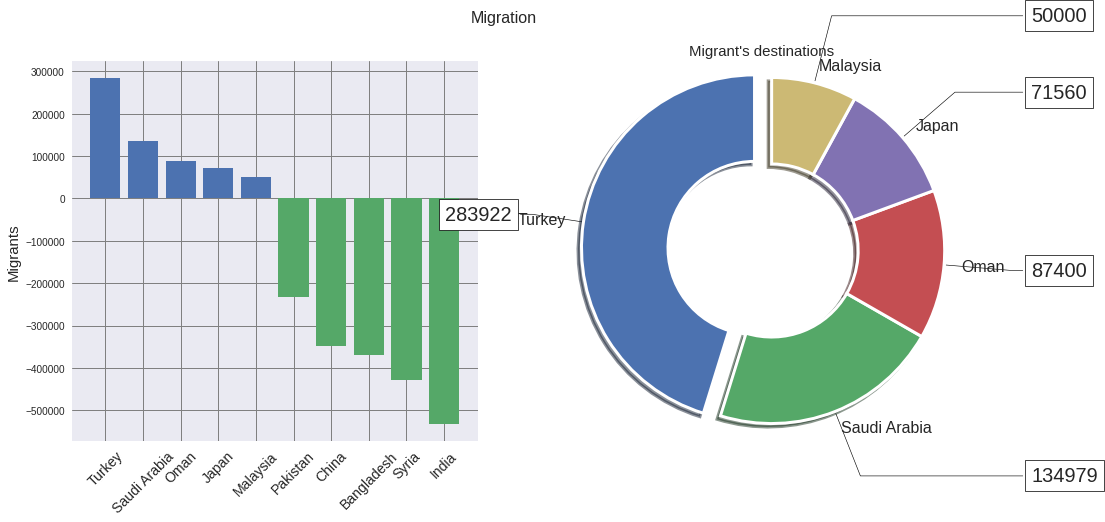

In [92]:
plt.style.use('seaborn')
fig3, ax3 = plt.subplots(1,2, figsize=(16,7))
plt.suptitle('Migration', size=16)
#population_df.sort_values('Migrants', ascending=False).plot('Country', 'Migrants', ax=ax3[0]);
ax3[0].set_ylabel('Migrants', size=15)
ax3[0].bar(migration_in.Country, migration_in.Migrants)
ax3[0].bar(migration_out.Country[::-1], migration_out.Migrants[::-1])
ax3[0].grid(color='grey')

#migration.plot.bar('Country', 'Migrants', ax=ax3[0])
#ax3[0].plot([0, 50], [0, 0], color='black', linestyle='dotted');
wedges, texts = ax3[1].pie(migration_in.Migrants, labels=migration_in.Country, explode=(.1, 0,0,0,0), shadow=True, startangle=90, wedgeprops=dict(width=0.5, edgecolor='white', linewidth=3), textprops={'fontsize': 16});

ax3[1].set_title('Migrant\'s destinations', size=15)
ax3[1].axis('equal') 
plt.sca(ax=ax3[0])
plt.xticks(rotation=45, size=14);

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    bbox_props = dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-", connectionstyle = "angle,angleA=0,angleB={}".format(ang), color='black', linewidth=0.6),bbox=bbox_props, zorder=0, va="center")
    #connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    #kw["arrowprops"].update({"connectionstyle": connectionstyle}) 
    ax3[1].annotate(migration_in.Migrants.values[i], xy=(x, y), xytext=(1.5*np.sign(x), 1.4*y),  horizontalalignment=horizontalalignment,size=20, **kw)

Issue three: Relatioship between Yearly Change' and 'Net Change'

net_change = births - deaths +(-) migrants

In [93]:
population_df.sort_values('NetChange', ascending=False).head(3)

,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare,Lat,Lan
12,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70,78.9629,20.5937
8,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47,104.1954,35.8617
32,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83,69.3451,30.3753


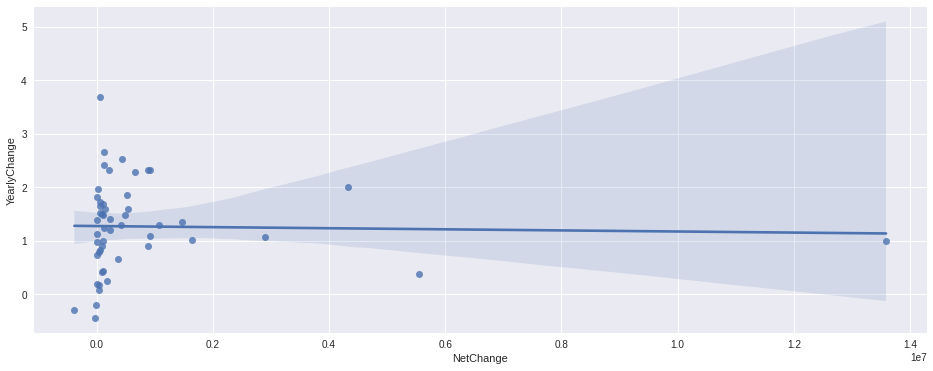

In [94]:
fig4, ax4 = plt.subplots(figsize = (16, 6))
#population_df.Population.plot(ax=ax4, marker='o')
sns.regplot(x=population_df.NetChange, y=population_df.YearlyChange);

The plot above demonstrates that there is no relation between these two elements: 'Yearly Change' and 'Net Change'.
The first one only shows the yearly population change in percentage, which indicated the total amount of change.
The second one is the total number of people added to (births and migrants) or removed from the population (peacefully passed away). So for countries such as 'India' and 'China' the yearly number of people added to the country might not constitute a radical change in their overall population.

Issue four: Population and other attributes

<AxesSubplot:xlabel='Population', ylabel='WorldShare'>

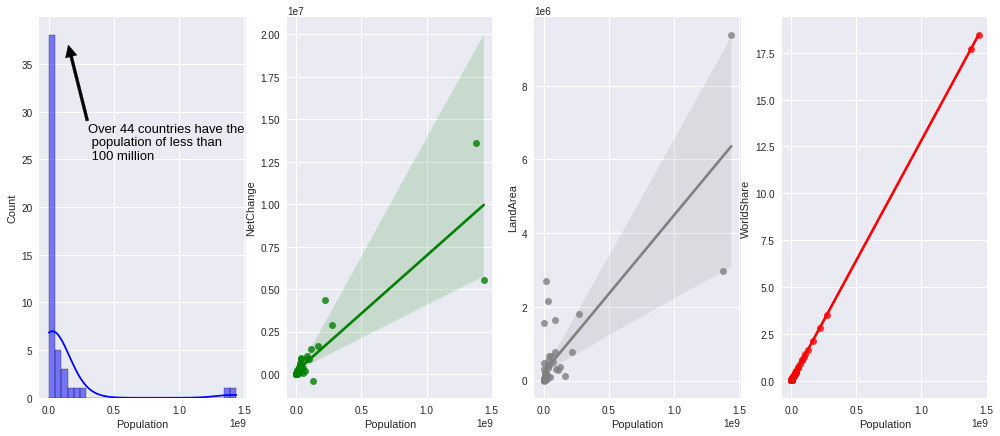

In [112]:
fig5, ax5 = plt.subplots(1,4, figsize=(17, 7))
sns.histplot(x=population_df.Population, kde=True, bins=30, ax=ax5[0], color='blue')
ax5[0].annotate('Over 44 countries have the\n population of less than\n 100 million', 
                xy=(150000000, 37), xytext=(300000000, 25), color='black', 
                arrowprops=dict(connectionstyle='arc3', facecolor='black', width=3), size=13)
sns.regplot(x=population_df.Population, y=population_df.NetChange, ax=ax5[1], color='green')
sns.regplot(x=population_df.Population, y=population_df.LandArea, color='grey', ax=ax5[2])
sns.regplot(x=population_df.Population, y=population_df.WorldShare, color='red', ax=ax5[3])

Most Aisan countries have the population of less than 200 million as shown in the first grapgh, and the two outliers among these countries again are 'China' and 'India' with over 1 billion of population.
Population is mostly related to the Worldshare which is share of the global population, and then LandArea and NetChange.

Issue five: Urban rate

In [110]:
urban_sorted = population_df.sort_values('UrbanPop', ascending=False).head(10)

In [113]:
top_urban_pop_max, top_urban_pop_min = (urban_sorted.UrbanPop.max(), urban_sorted.UrbanPop.min())

Text(0, 0.5, 'Urban Population')

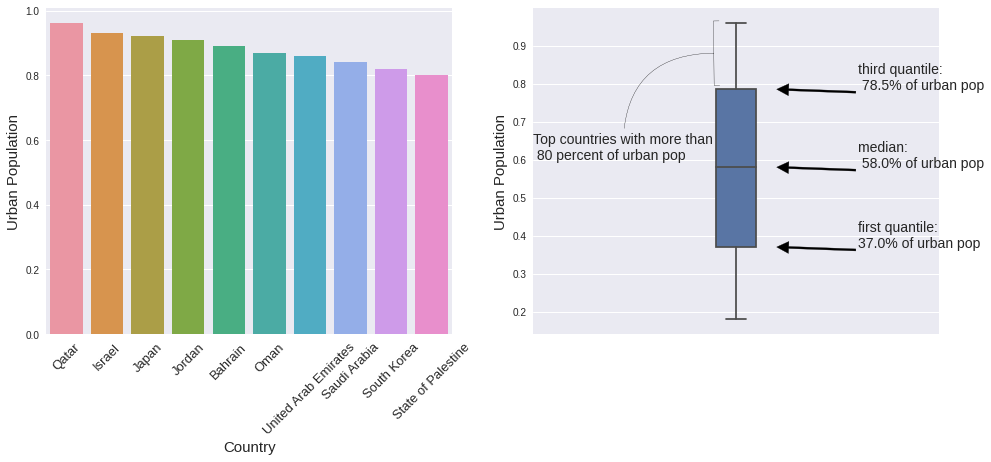

In [130]:
plt.style.use('seaborn')
fig6, ax6 = plt.subplots(1,2, figsize=(16, 6))
sns.barplot(x=urban_sorted.Country[:10:], y=urban_sorted.UrbanPop[:10:]/100, ax=ax6[0]);
sns.boxplot(y=population_df.UrbanPop/100, ax=ax6[1], width=.1);
plt.sca(ax=ax6[0]);
plt.xticks(rotation=45, size=13);

ax6[0].set_xlabel('Country', size=15)
ax6[0].set_ylabel('Urban Population', size=15)

ax6[1].annotate(f'third quantile:\n {population_df.UrbanPop.quantile(.75)}% of urban pop', 
                xy=(.1, population_df.UrbanPop.quantile(.75)/100), xytext=(.3, population_df.UrbanPop.quantile(.75)/100), 
                arrowprops=dict(connectionstyle='arc3', facecolor='black', width=2), size=14);
ax6[1].annotate(f'median:\n {population_df.UrbanPop.quantile(.5)}% of urban pop', 
                xy=(.1, population_df.UrbanPop.quantile(.5)/100), xytext=(.3, population_df.UrbanPop.quantile(.5)/100), 
                arrowprops=dict(connectionstyle='arc3', facecolor='black', width=2), size=14);
ax6[1].annotate(f'first quantile: \n{population_df.UrbanPop.quantile(.25)}% of urban pop', 
                xy=(.1, population_df.UrbanPop.quantile(.25)/100), xytext=(.3, population_df.UrbanPop.quantile(.25)/100), 
                arrowprops=dict(connectionstyle='arc3', facecolor='black', width=2), size=14);
ax6[1].annotate('Top countries with more than\n 80 percent of urban pop',
                xy=(-.05, (top_urban_pop_max+ top_urban_pop_min)/200), xytext=(-.5, .6),
                arrowprops=dict(arrowstyle='-[, widthB=2.3, lengthB=0.4, angleB=0', connectionstyle='Angle3', facecolor='black'), size=14  
               );
ax6[1].set_ylabel('Urban Population', size=15)

#ax6[1].clear()
#fig6.clear()

The graphs above illustrate the urban rate of different countries. The top 10 countries are Qatar with 96 percent of urban population down to Palestine with 80 percent of urban population.
Most of the countries have 60 percent of urban population and they all range from 20 to 90 percent.

Issue six: Land Area

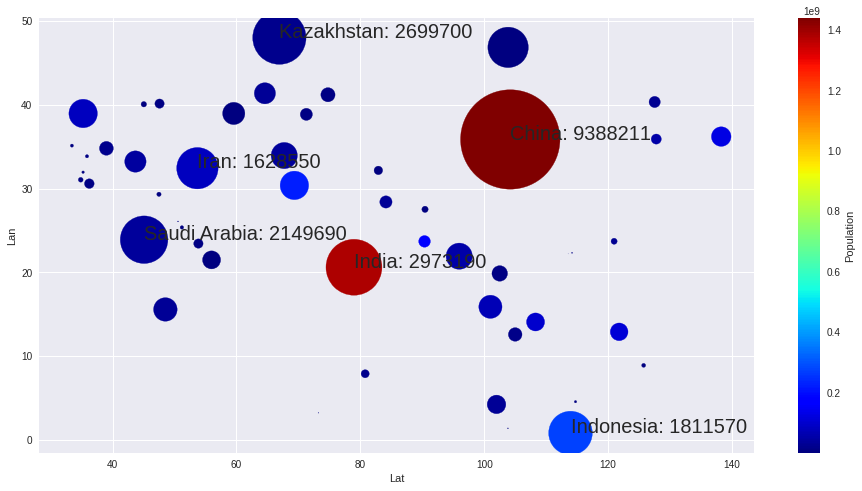

In [131]:
fig8, ax8 = plt.subplots(figsize=(16,8))
population_df.plot(x='Lat', y='Lan', kind='scatter', s=population_df.LandArea/950, c='Population', cmap='jet', ax=ax8)

biggest_countries = population_df.sort_values('LandArea', ascending=False).head(6)
for x,y,z,a in zip(biggest_countries.Lat, biggest_countries.Lan, biggest_countries.Country, biggest_countries.LandArea):
    ax8.annotate(f'{z}: {a}', xy=(x,y), xytext=(x, y), size=20);
#ax8.axis('equal')

As you can see, the biggest countries are China with 9.3 million km², India, Kazakhstan, Saudi Arabia, Indonesia and Iran.

------------------

Statistical analysis:

let's figure out if there are any outliers in population:

In [132]:
q1 = population_df.Population.quantile(.25)
q3 = population_df.Population.quantile(.75)
IQR = q3 - q1

In [133]:
population_df[(population_df.Population < (q1 - 1.5*IQR)) | (population_df.Population > (q3 + 1.5*IQR))].sort_values('Population', ascending=False).reset_index()

,index,Country,Population,YearlyChange,NetChange,Density,LandArea,Migrants,FertRate,MedAge,UrbanPop,WorldShare,Lat,Lan
0,8,China,1439323776,0.39,5540090,153,9388211,-348399,1.7,38,61.0,18.47,104.1954,35.8617
1,12,India,1380004385,0.99,13586631,464,2973190,-532687,2.2,28,35.0,17.70,78.9629,20.5937
2,13,Indonesia,273523615,1.07,2898047,151,1811570,-98955,2.3,30,56.0,3.51,113.9213,0.7893
3,32,Pakistan,220892340,2.00,4327022,287,770880,-233379,3.6,23,35.0,2.83,69.3451,30.3753
4,4,Bangladesh,164689383,1.01,1643222,1265,130170,-369501,2.1,28,39.0,2.11,90.3563,23.6850
5,17,Japan,126476461,-0.30,-383840,347,364555,71560,1.4,48,92.0,1.62,138.2529,36.2048
6,33,Philippines,109581078,1.35,1464463,368,298170,-67152,2.6,26,47.0,1.41,121.7740,12.8797


The countries above could be considered as outliers in population

In [134]:
population_df_e = population_df[(population_df.Country != 'China') & (population_df.Country != 'India')]
pop_pdf_0 = norm.pdf(population_df.Population.sort_values(), population_df.Population.mean(), population_df.Population.std())
pop_pdf_1 = norm.pdf(population_df_e.Population.sort_values(), population_df_e.Population.mean(), population_df_e.Population.std())
pop_cdf = norm.cdf(population_df_e.Population.sort_values(), population_df_e.Population.mean(), population_df_e.Population.std())

Text(0, 0.5, 'Cumulative density')

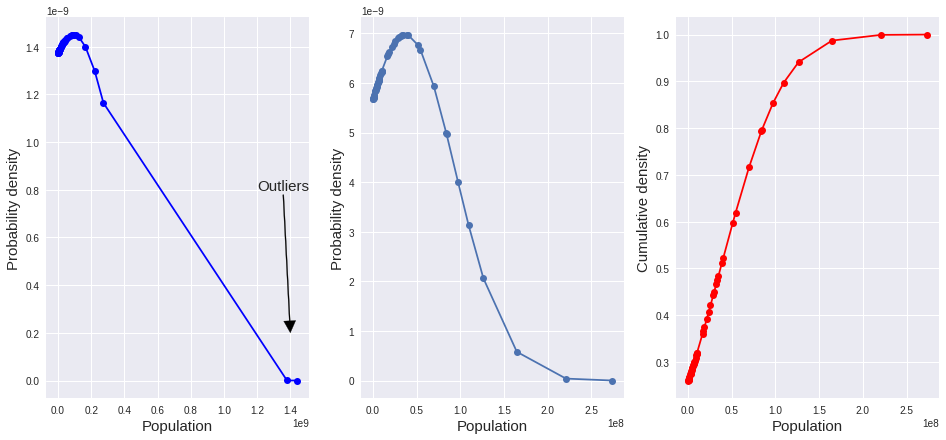

In [135]:
plt.style.use('seaborn')
fig7, ax7 = plt.subplots(1,3, figsize=(16,7))
ax7[0].plot(population_df.Population.sort_values(), pop_pdf_0, marker='o', color='blue')
ax7[1].plot(population_df_e.Population.sort_values(), pop_pdf_1, marker='o')
ax7[2].plot(population_df_e.Population.sort_values(), pop_cdf, marker='o', color='red')
ax7[0].annotate('Outliers', xy=(1400000000, .2e-09), xytext=(1200323776,.8e-09), size=15, arrowprops=dict(connectionstyle='arc3', facecolor='black', width=1))
ax7[0].set_xlabel('Population', size=15)
ax7[1].set_xlabel('Population', size=15)
ax7[2].set_xlabel('Population', size=15)
ax7[0].set_ylabel('Probability density', size=15)
ax7[1].set_ylabel('Probability density', size=15)
ax7[2].set_ylabel('Cumulative density', size=15)
#ax7[0].get_ylim()

First we detected the outliers in the Population attribute and then used the density function to evaluate it. Then tried the density function without our two outliers and came up with our second figure. For the first two figures, probability density function was used, then for the last one cumulative density function was implemented.

As you saw previoulsy in the heatmap, the best relatioship was between Population and Worldshare.
For the next step let's do some simple linear regression to predict other asian countries.

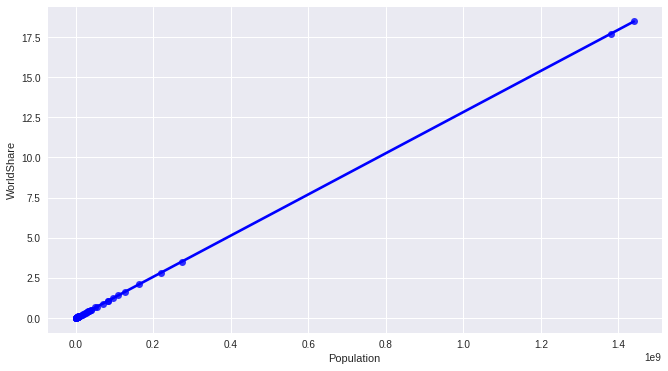

In [138]:
fig9, ax9 = plt.subplots(figsize=(11,6))
sns.regplot(x=population_df.Population, y=population_df.WorldShare, color='blue');

It's totally linear, so let's do some simple prediction:

In [139]:
slope, intercept, r, p, std_err = stats.linregress(population_df.Population, population_df.WorldShare)

In [140]:
def lin_reg_func (x):
    return slope * x + intercept

Now our liner regression is ready, and we can try other countries. 
For example New Zeland has the population of 5.084 million.

In [141]:
lin_reg_func(5084000) #5084000 is New Zeland's population

0.0658387900948238

New Zelan's world share would approximately be 0.06

--------------------------

For the next step we will divide the countries into two half. East Asia and West Asia.

In [86]:
population_df.Lat.mean() #the latitude of the center of Asia

78.28070980392157

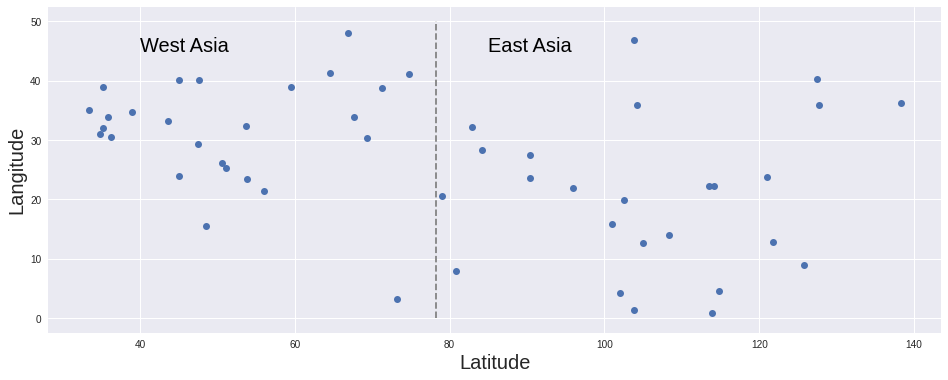

In [142]:
fig10, ax10 = plt.subplots(figsize=(16,6))
ax10.plot(population_df.Lat, population_df.Lan, marker='o', linestyle='None')
ax10.plot([population_df.Lat.mean(), population_df.Lat.mean()], [0, 50], linestyle='dashed', color='grey')

ax10.set_xlabel('Latitude', size=20)
ax10.set_ylabel('Langitude', size=20)

ax10.text(40, 45, 'West Asia', size=20, color='black');
ax10.text(85, 45, 'East Asia', size=20, color='black');

In [143]:
west_asia = population_df[population_df.Lat <= population_df.Lat.mean()]
east_asia = population_df[population_df.Lat > population_df.Lat.mean()]

From now on we will compare the left side to the right side.

First of all let's compare the world share of these two sides:

Text(0.5, 0, 'World share')

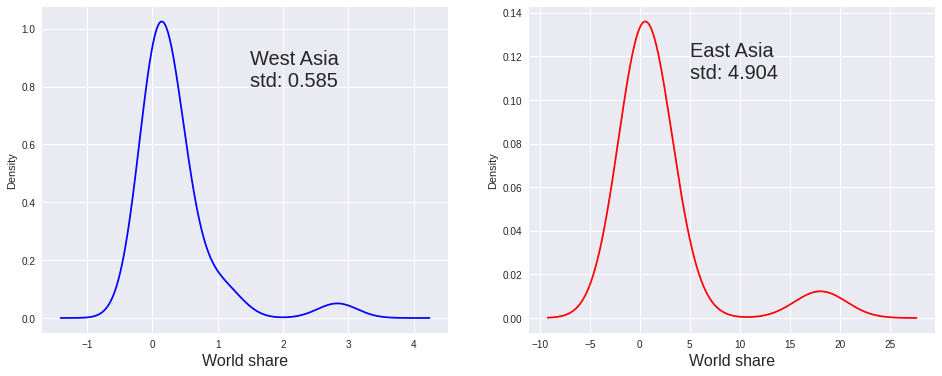

In [144]:
plt.style.use('seaborn')
fig11, ax11 = plt.subplots(1,2, figsize=(16, 6))
west_asia.WorldShare.plot(kind='kde', ax=ax11[0], color='blue')
east_asia.WorldShare.plot(kind='kde', ax=ax11[1], color='red')
ax11[0].text(1.5,.8, f'West Asia\nstd: {round(west_asia.WorldShare.std(), 3)}', size=20)
ax11[1].text(5,.11, f'East Asia\nstd: {round(east_asia.WorldShare.std(), 3)}', size=20)
ax11[0].set_xlabel('World share', size=16)
ax11[1].set_xlabel('World share', size=16)

As you see, the west Asia has the most density of 1, while the east Asia is far less than that, approximately 0.14.
This indicates that the west side has more countries with the same world share, and that's mostly between 0 to 1(which means better density, lower standard deviation). And the east side has wider range of world shares (weaker density, with higher standard deviation).

Now let's check the age median:

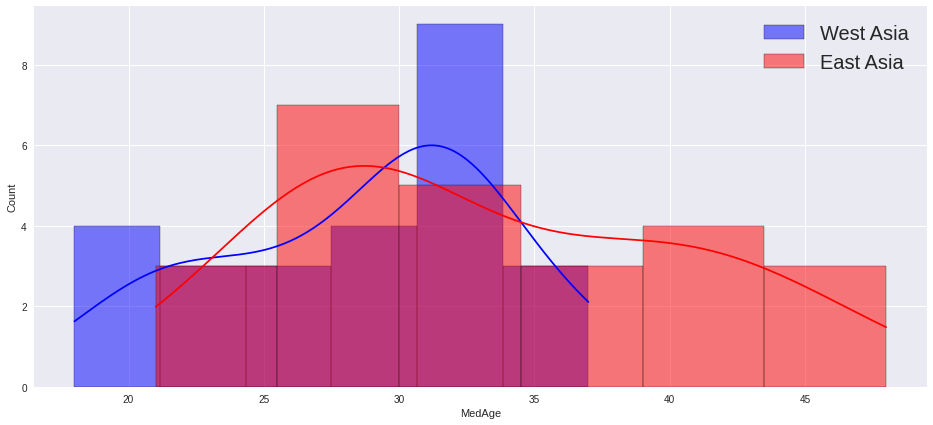

In [145]:
fig12, ax12 = plt.subplots(figsize=(16, 7))
sns.histplot(west_asia.MedAge, ax=ax12, color='blue', kde=True, label='West Asia');
sns.histplot(east_asia.MedAge, ax=ax12, color='red', kde=True, label='East Asia');
ax12.legend(fontsize=20);

The histogram above shows the median age of two sides. The west side has more younger people and in this side more countries have the median age of 32. However the east side have more elderly people, but more countries have the median age of 27.

And finally we will take a look at the migration rate among these two sides:

In [146]:
west_asia_migrants = west_asia.sort_values('Migrants', ascending=True)
east_asia_migrants = east_asia.sort_values('Migrants', ascending=True)

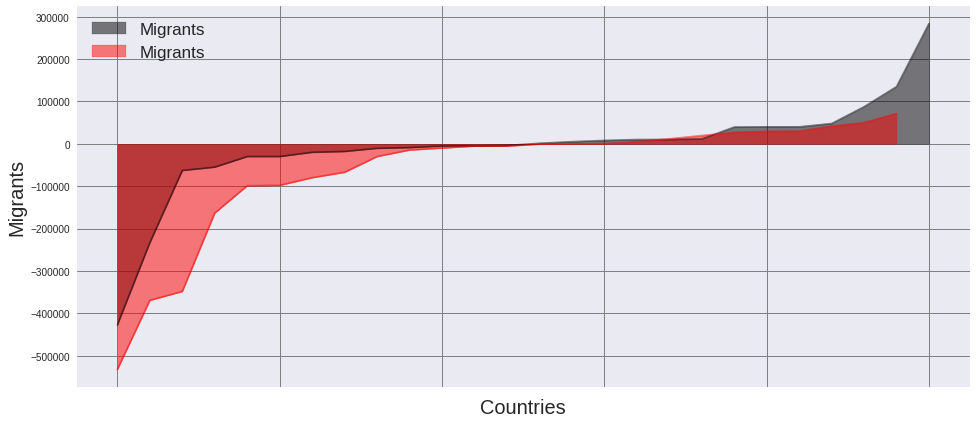

In [148]:
fig13, ax13 = plt.subplots(figsize=(16, 7))

west_asia_migrants.plot.area(x='Country', y='Migrants', stacked=False, ax=ax13, color='black')
east_asia_migrants.plot.area(x='Country', y='Migrants', stacked=False, ax=ax13, color='red')

ax13.axes.xaxis.set_ticklabels([])
ax13.set_xlabel('Countries', size=20)
ax13.set_ylabel('Migrants', size=20)
ax13.grid(color='grey')
ax13.legend(fontsize=17)
plt.xticks(rotation=45);

The figure above demonstrates that the west side(blue bars) has more incoming migrants than the east side(red lines), so the east side loses more people (those who emigrate) than the west side.
And what is clear is that more countries have migrants of more or less than 10,000 people.